# Introduction to Data Science 2025

# Week 2

## Exercise 1 | Titanic: data preprocessing and imputation
<span style="font-weight: bold"> *Note: You can find tutorials for NumPy and Pandas under 'Useful tutorials' in the course material.*</span>

Download the [Titanic dataset](https://www.kaggle.com/c/titanic) [train.csv] from Kaggle or <span style="font-weight: 500">directly from the course material</span>, and complete the following exercises. If you choose to download the dataset from Kaggle, you will need to create a Kaggle account unless you already have one, but it is quite straightforward.

The dataset consists of personal information of all the passengers on board the RMS Titanic, along with information about whether they survived the iceberg collision or not.

1. Your first task is to read the data file and print the shape of the data.

    <span style="font-weight: 500"> *Hint 1: You can read them into a Pandas dataframe if you wish.*</span>
    
    <span style="font-weight: 500"> *Hint 2: The shape of the data should be (891, 12).*</span>

In [749]:
import numpy as np
import pandas as pd
from json import loads, dumps
import seaborn as sns
import math 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
titanic = pd.read_csv("titanic.csv")

print(titanic.shape)


(891, 12)


2. Let's look at the data and get started with some preprocessing. Some of the columns, e.g <span style="font-weight: 500"> *Name*</span>, simply identify a person and are not useful for prediction tasks. Try to identify these columns, and remove them.

    <span style="font-weight: 500"> *Hint: The shape of the data should now be (891, 9).*</span>

In [750]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0000000000,1,0,A/5 21171,7.2500000000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0000000000,1,0,PC 17599,71.2833000000,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0000000000,0,0,STON/O2. 3101282,7.9250000000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000000000,1,0,113803,53.1000000000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0000000000,0,0,373450,8.0500000000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0000000000,0,0,211536,13.0000000000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0000000000,0,0,112053,30.0000000000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500000000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0000000000,0,0,111369,30.0000000000,C148,C


In [751]:
titanic=titanic.drop(["Name", "Fare", "Ticket"], axis=1)

titanic



,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,1,0,3,male,22.0000000000,1,0,NaN,S
1,2,1,1,female,38.0000000000,1,0,C85,C
2,3,1,3,female,26.0000000000,0,0,NaN,S
3,4,1,1,female,35.0000000000,1,0,C123,S
4,5,0,3,male,35.0000000000,0,0,NaN,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0000000000,0,0,NaN,S
887,888,1,1,female,19.0000000000,0,0,B42,S
888,889,0,3,female,NaN,1,2,NaN,S
889,890,1,1,male,26.0000000000,0,0,C148,C


3. The column <span style="font-weight: 500">*Cabin*</span> contains a letter and a number. A smart catch at this point would be to notice that the letter stands for the deck level on the ship. Keeping just the deck information would be more informative when developing, e.g. a classifier that predicts whether a passenger survived. The next step in our preprocessing will be to add a new column to the dataset, which consists simply of the deck letter. You can then remove the original <span style="font-weight: 500">*Cabin*</span>-column.

<span style="font-weight: 500">*Hint: The deck letters should be ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T'].*</span>

In [752]:
titanic["DeckLetter"] = titanic["Cabin"].str[0]

titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,DeckLetter
0,1,0,3,male,22.0000000000,1,0,NaN,S,NaN
1,2,1,1,female,38.0000000000,1,0,C85,C,C
2,3,1,3,female,26.0000000000,0,0,NaN,S,NaN
3,4,1,1,female,35.0000000000,1,0,C123,S,C
4,5,0,3,male,35.0000000000,0,0,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0000000000,0,0,NaN,S,NaN
887,888,1,1,female,19.0000000000,0,0,B42,S,B
888,889,0,3,female,NaN,1,2,NaN,S,NaN
889,890,1,1,male,26.0000000000,0,0,C148,C,C


4. You’ll notice that some of the columns, such as the previously added deck number, are [categorical](https://en.wikipedia.org/wiki/Categorical_variable). To preprocess the categorical variables so that they're ready for further computation, we need to avoid the current string format of the values. This means the next step for each categorical variable is to transform the string values to numeric ones, that correspond to a unique integer ID representative of each distinct category. This process is called label encoding and you can read more about it [here](https://pandas.pydata.org/docs/user_guide/categorical.html).

    <span style="font-weight: 500">*Hint: Pandas can do this for you.*</span>

In [753]:
titanic['DeckCodes']=pd.Categorical(titanic['DeckLetter']).codes
titanic['SexCodes']=pd.Categorical(titanic['Sex']).codes
titanic['EmbarkedCodes']=pd.Categorical(titanic['Embarked']).codes

titanic=titanic.drop(["Cabin", "Sex", "DeckLetter", "Embarked"], axis=1)

5. Next, let's look into missing value **imputation**. Some of the rows in the data have missing values, e.g when the cabin number of a person is unknown. Most machine learning algorithms have trouble with missing values, and they need to be handled during preprocessing:

    a) For continuous variables, replace the missing values with the mean of the non-missing values of that column.

    b) For categorical variables, replace the missing values with the mode of the column.

    <span style="font-weight: 500">*Remember: Even though in the previous step we transformed categorical variables into their numeric representation, they are still categorical.*</span>

In [754]:
titanic['Age'] = titanic.Age.replace(np.NaN, titanic['Age'].mean())
titanic['EmbarkedCodes'] = titanic.EmbarkedCodes.replace(-1, titanic['EmbarkedCodes'].mode().iloc[0])

6. At this point, all data is numeric. Write the data, with the modifications we made, to a  <span style="font-weight: 500"> .csv</span> file. Then, write another file, this time in <span style="font-weight: 500">JSON</span> format, with the following structure:

In [755]:
#[
#    {
#        "Deck": 0,
#        "Age": 20,
#        "Survived", 0
#        ...
#    },
#    {
#        ...
#    }
#]

In [756]:
titanic_json = titanic.to_json(orient="index")

parsed = loads(titanic_json)
parsed

{'0': {'PassengerId': 1,
  'Survived': 0,
  'Pclass': 3,
  'Age': 22.0,
  'SibSp': 1,
  'Parch': 0,
  'DeckCodes': -1,
  'SexCodes': 1,
  'EmbarkedCodes': 2},
 '1': {'PassengerId': 2,
  'Survived': 1,
  'Pclass': 1,
  'Age': 38.0,
  'SibSp': 1,
  'Parch': 0,
  'DeckCodes': 2,
  'SexCodes': 0,
  'EmbarkedCodes': 0},
 '2': {'PassengerId': 3,
  'Survived': 1,
  'Pclass': 3,
  'Age': 26.0,
  'SibSp': 0,
  'Parch': 0,
  'DeckCodes': -1,
  'SexCodes': 0,
  'EmbarkedCodes': 2},
 '3': {'PassengerId': 4,
  'Survived': 1,
  'Pclass': 1,
  'Age': 35.0,
  'SibSp': 1,
  'Parch': 0,
  'DeckCodes': 2,
  'SexCodes': 0,
  'EmbarkedCodes': 2},
 '4': {'PassengerId': 5,
  'Survived': 0,
  'Pclass': 3,
  'Age': 35.0,
  'SibSp': 0,
  'Parch': 0,
  'DeckCodes': -1,
  'SexCodes': 1,
  'EmbarkedCodes': 2},
 '5': {'PassengerId': 6,
  'Survived': 0,
  'Pclass': 3,
  'Age': 29.6991176471,
  'SibSp': 0,
  'Parch': 0,
  'DeckCodes': -1,
  'SexCodes': 1,
  'EmbarkedCodes': 1},
 '6': {'PassengerId': 7,
  'Survived': 

Study the records and try to see if there is any evident pattern in terms of chances of survival.

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 2 | Titanic 2.0: exploratory data analysis

In this exercise, we’ll continue to study the Titanic dataset from the last exercise. Now that we have done some preprocessing, it’s time to look at the data with some exploratory data analysis.

1. First investigate each feature variable in turn. For each categorical variable, find out the mode, i.e., the most frequent value. For numerical variables, calculate the median value.

In [757]:
# Survived:

mean = titanic["Survived"].mean()
medi = titanic["Survived"].median()
val_count = titanic["Survived"].value_counts()

print("Mean: ", mean, "Median: ", medi)
print(val_count)


Mean:  0.3838383838383838 Median:  0.0
Survived
0    549
1    342
Name: count, dtype: int64


In [758]:
# Pclass:

mean = titanic["Pclass"].mean()
medi = titanic["Pclass"].median()
val_count = titanic["Pclass"].value_counts()

print("Mean: ", mean, "Median: ", medi)
print(val_count)

Mean:  2.308641975308642 Median:  3.0
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [759]:
#Sex

val_count = titanic["SexCodes"].value_counts()

print(val_count)

SexCodes
1    577
0    314
Name: count, dtype: int64


In [760]:
#Age

mean = titanic["Age"].mean()
medi = titanic["Age"].median()
val_count = titanic["Age"].value_counts()
maxi = titanic["Age"].max()
mini = titanic["Age"].min()

print("Mean: ", mean, "Median: ", medi, "Min", mini, "Max", maxi)
print(val_count)

Mean:  29.69911764705882 Median:  29.69911764705882 Min 0.42 Max 80.0
Age
29.6991176471    177
24.0000000000     30
22.0000000000     27
18.0000000000     26
28.0000000000     25
                ... 
36.5000000000      1
55.5000000000      1
0.9200000000       1
23.5000000000      1
74.0000000000      1
Name: count, Length: 89, dtype: int64


In [761]:
#SibSp

mean = titanic["SibSp"].mean()
medi = titanic["SibSp"].median()
val_count = titanic["SibSp"].value_counts()

print("Mean: ", mean, "Median: ", medi)
print(val_count)

Mean:  0.5230078563411896 Median:  0.0
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


In [762]:
#Parch

mean = titanic["Parch"].mean()
medi = titanic["Parch"].median()
val_count = titanic["Parch"].value_counts()

print("Mean: ", mean, "Median: ", medi)
print(val_count)

Mean:  0.38159371492704824 Median:  0.0
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [763]:
#Embarked

print(titanic["EmbarkedCodes"].value_counts())

EmbarkedCodes
2    646
0    168
1     77
Name: count, dtype: int64


In [764]:
#DeckLetter

print(titanic["DeckCodes"].value_counts())

DeckCodes
-1    687
 2     59
 1     47
 3     33
 4     32
 0     15
 5     13
 6      4
 7      1
Name: count, dtype: int64


In [765]:
titanic

,PassengerId,Survived,Pclass,Age,SibSp,Parch,DeckCodes,SexCodes,EmbarkedCodes
0,1,0,3,22.0000000000,1,0,-1,1,2
1,2,1,1,38.0000000000,1,0,2,0,0
2,3,1,3,26.0000000000,0,0,-1,0,2
3,4,1,1,35.0000000000,1,0,2,0,2
4,5,0,3,35.0000000000,0,0,-1,1,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0000000000,0,0,-1,1,2
887,888,1,1,19.0000000000,0,0,1,0,2
888,889,0,3,29.6991176471,1,2,-1,0,2
889,890,1,1,26.0000000000,0,0,2,1,0


2. Next, combine the modes of the categorical variables, and the medians of the numerical variables, to construct an imaginary “average survivor”. This "average survivor" should represent the typical passenger of the class of passengers who survived. Also following the same principle, construct the “average non-survivor”.

    <span style="font-weight: 500">*Hint 1: What are the average/most frequent variable values for a non-survivor?*</span>
    
    <span style="font-weight: 500">*Hint 2: You can split the dataframe in two: one subset containing all the survivors and one consisting of all the non-survivor instances. Then, you can use the summary statistics of each of these dataframe to create a prototype "average survivor" and "average non-survivor", respectively.*</span>

In [766]:
# Average Survivor:

survivors=titanic[titanic['Survived']==1]

survivors.mean()

PassengerId     444.3684210526
Survived          1.0000000000
Pclass            1.9502923977
Age              28.5497781218
SibSp             0.4736842105
Parch             0.4649122807
DeckCodes         0.3567251462
SexCodes          0.3187134503
EmbarkedCodes     1.3684210526
dtype: float64

In [767]:

non_survivors=titanic[titanic['Survived']==0]

non_survivors.mean()

PassengerId     447.0163934426
Survived          0.0000000000
Pclass            2.5318761384
Age              30.4150996464
SibSp             0.5537340619
Parch             0.3296903461
DeckCodes        -0.5846994536
SexCodes          0.8524590164
EmbarkedCodes     1.6411657559
dtype: float64

3. Next, let's study the distributions of the variables in the two groups (survivor/non-survivor). How well do the average cases represent the respective groups? Can you find actual passengers that are very similar to the (average) representative of their own group? Can you find passengers that are very similar to the (average) representative of the other group?

    <span style="font-weight: 500">*Note: Feel free to choose EDA methods according to your preference: non-graphical/graphical, static/interactive - anything goes.*</span>

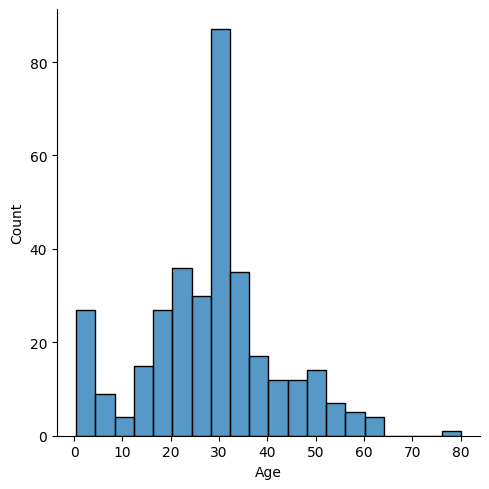

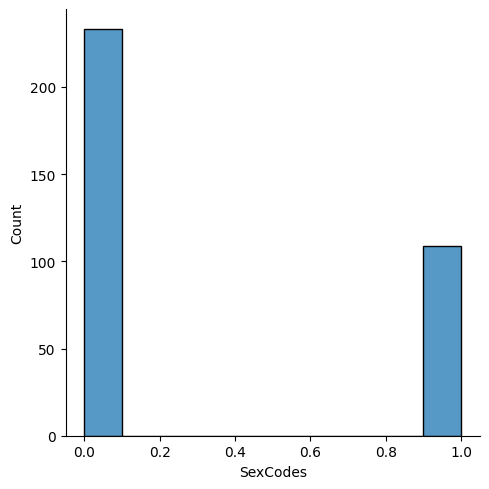

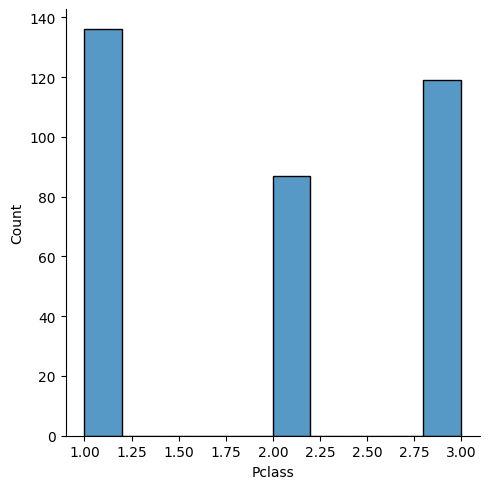

In [768]:
sns.displot(survivors, x="Age")
sns.displot(survivors, x="SexCodes")
sns.displot(survivors, x="Pclass")

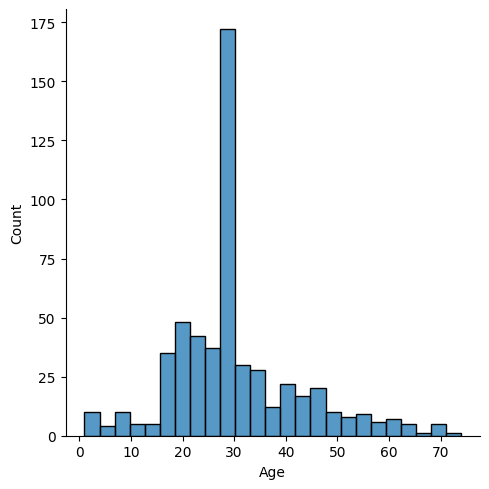

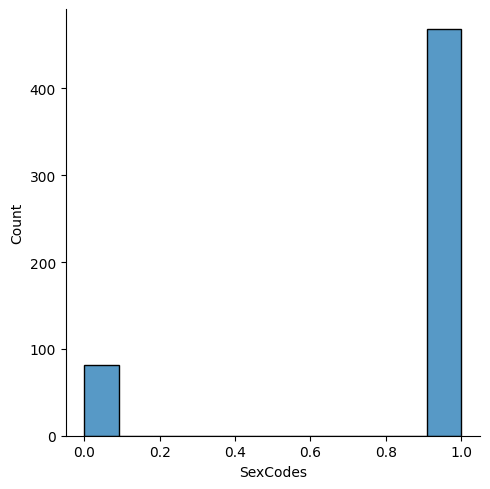

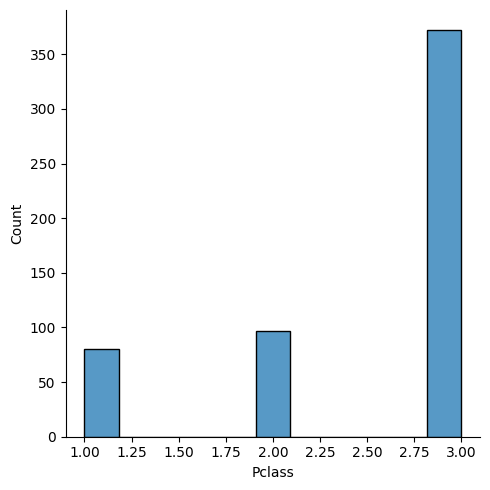

In [769]:
sns.displot(non_survivors, x="Age")
sns.displot(non_survivors, x="SexCodes")
sns.displot(non_survivors, x="Pclass")


4. Next, let's continue the analysis by looking into pairwise and multivariate relationships between the variables in the two groups. Try to visualize two variables at a time using, e.g., scatter plots and use a different color to encode the survival status.

    <span style="font-weight: 500">*Hint 1: You can also check out Seaborn's pairplot function, if you wish.*</span>

    <span style="font-weight: 500">*Hint 2: To better show many data points with the same value for a given variable, you can use either transparency or ‘jitter’.*</span>

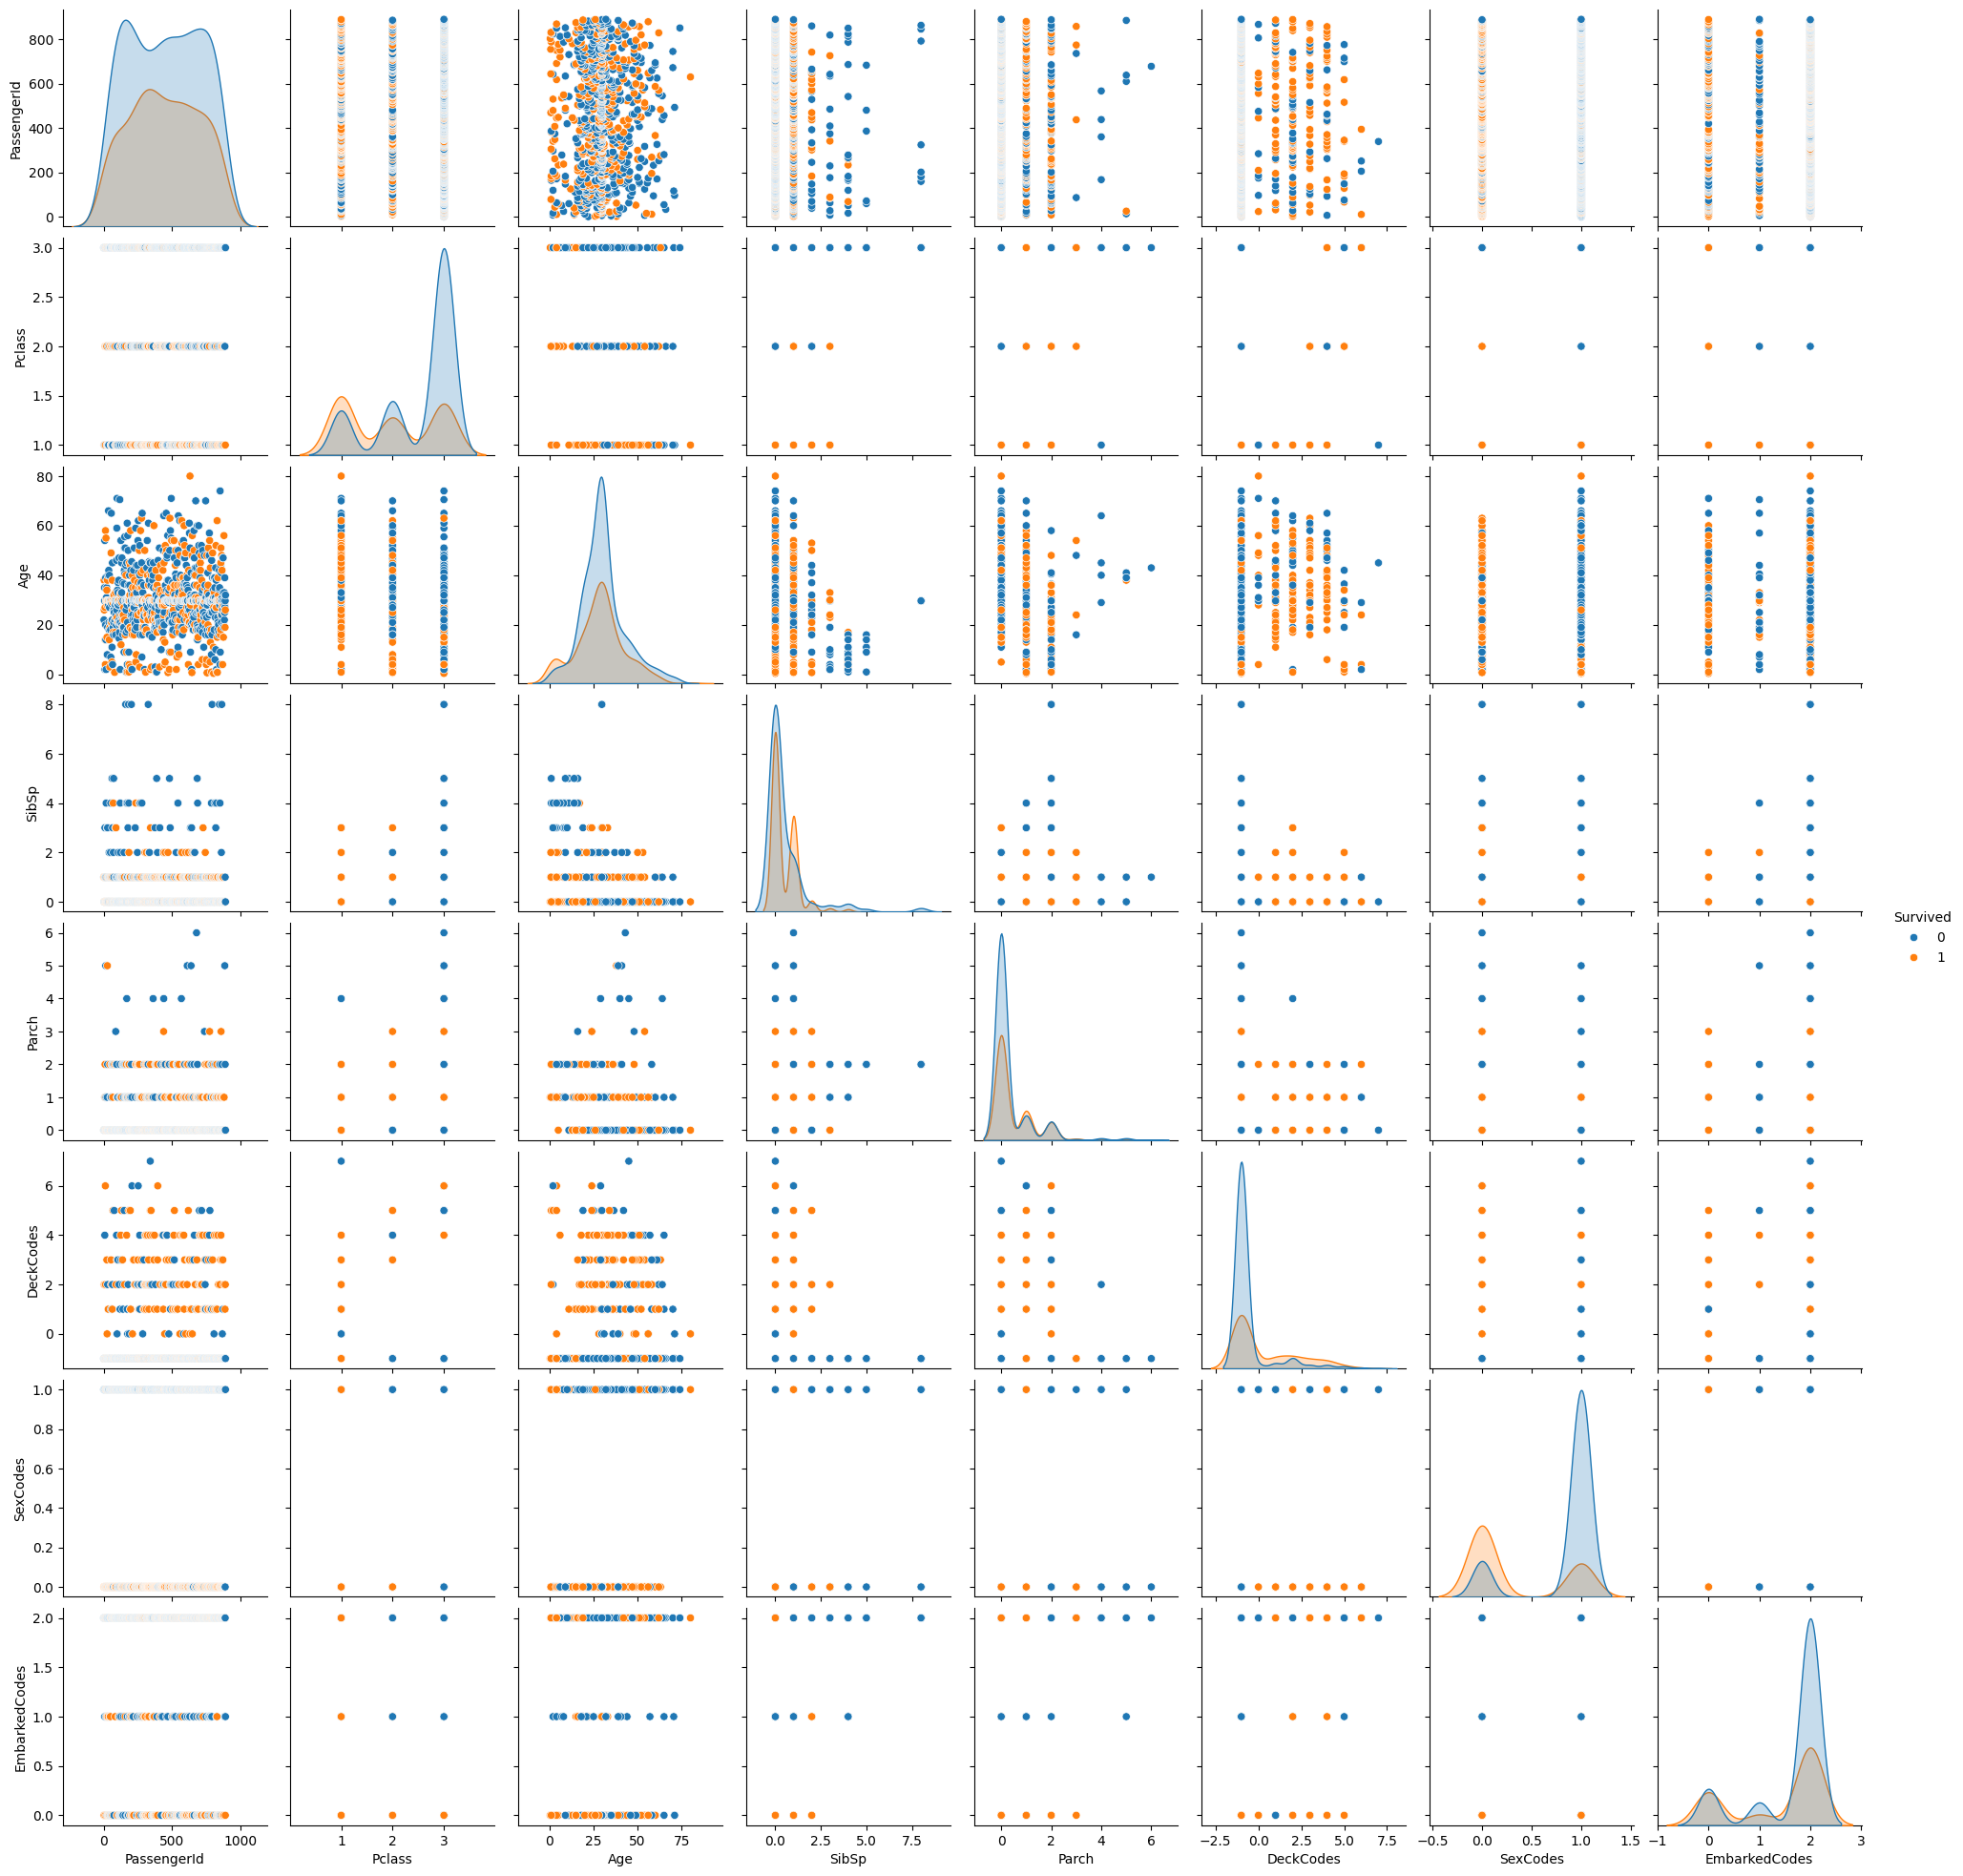

In [770]:
sns.pairplot(titanic, hue="Survived")

5. Finally, recall the preprocessing we did in the first exercise. What can you say about the effect of the choices that were made to use the mode and mean to impute missing values, instead of, for example, ignoring passengers with missing data?

Personally, I would first fill in all nan values before converting them into categories. This makes it easier to manipulate etc. So first cleaning, then transforming. Filling in missing data instead of ignoring those rows makes a huge difference because over half of the dataset would be lost if this were to happen. Also the reason behind lost data here is that these people died, meaning that the results would get skewed towards more people staying alive in relation to the total population.

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 3 | Working with text data 2.0

This exercise is related to the second exercise from last week. Find the saved <span style="font-weight: 500">pos.txt</span> and <span style="font-weight: 500">neg.txt</span> files, or, alternatively, you can find the week 1 example solutions on the MOOC platform after Tuesday.

1. Find the most common words in each file (positive and negative). Examine the results. Do they tend to be general terms relating to the nature of the data? How well do they indicate positive/negative sentiment?

In [771]:
pos = pd.read_csv("pos.txt")
neq = pd.read_csv("neq.txt")

pos = pos.drop("Unnamed: 0", axis=1)

neq = neq.drop("Unnamed: 0", axis=1)

In [772]:
pos_count = pos['reviewText'].str.split().explode().value_counts().reset_index()

In [773]:
neq_count = neq['reviewText'].str.split().explode().value_counts().reset_index()

I'd say that generally the positive feedbacks have positive words like "Great", "Perfect", "Good" and "Easi" but neqative reviews have more indepth wordings where the word count doesn't necessarily reveal the whole truth. I'd suppose this is because the taking the effort of writing a negative feedback you don't wanna just say bad product, you want to elaborate and convince people that it's actually bad and thus it doesn't contain as many typical words like "bad", "sucks", etc.

2. Compute a [TF/IDF](https://en.wikipedia.org/wiki/Tf–idf) vector for each of the two text files, and make them into a <span style="font-weight: 500">2 x m</span> matrix, where <span style="font-weight: 500">m</span> is the number of unique words in the data. The problem with using the most common words in a review to analyze its contents is that words that are common overall will be common in all reviews (both positive and negative). This means that they probably are not good indicators about the sentiment of a specific review. TF/IDF stands for Term Frequency / Inverse Document Frequency (here the reviews are the documents), and is designed to help by taking into consideration not just the number of times a term occurs (term frequency), but also how many times a word exists in other reviews as well (inverse document frequency). You can use any variant of the formula, as well as off-the-shelf implementations. <span style="font-weight: 500">*Hint: You can use [sklearn](http://scikit-learn.org/).*</span>

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer

neq["reviewText"] = neq["reviewText"].fillna("")
tfidf_vectorizer=TfidfVectorizer(use_idf=True) 
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(neq['reviewText'].tolist())
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0] 


neq_tfidf = pd.DataFrame(
    first_vector_tfidfvectorizer.todense(),
    columns=tfidf_vectorizer.get_feature_names_out()
)


neq_ascending = neq_tfidf.transpose().reset_index().sort_values(by=[0], ascending=False)


In [ ]:
pos["reviewText"] = pos["reviewText"].fillna("")
tfidf_vectorizer=TfidfVectorizer(use_idf=True) 
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(pos['reviewText'].tolist())
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0] 

pos_tfidf = pd.DataFrame(
    first_vector_tfidfvectorizer.todense(),
    columns=tfidf_vectorizer.get_feature_names_out()
)


pos_ascending = pos_tfidf.transpose().reset_index().sort_values(by=[0], ascending=False)


3. List the words with the highest TF/IDF score in each class (positive | negative), and compare them to the most common words. What do you notice? Did TF/IDF work as expected?

In [790]:
pos_ascending

,index,0
175614,stand,0.5533967716
158924,review,0.2575531250
144253,phone,0.1739302370
105774,im,0.1573310402
195002,use,0.1476161503
...,...,...
70429,drillsthi,0.0000000000
70430,drillstop,0.0000000000
70431,drilltap,0.0000000000
70432,drilltapor,0.0000000000


In [791]:
neq_ascending

,index,0
41254,pick,0.4247991440
51189,suck,0.3977198672
19500,definit,0.3835766799
12318,bare,0.3816275491
42572,pretti,0.3397442482
...,...,...
20132,diffent,0.0000000000
20133,differ,0.0000000000
20134,differenati,0.0000000000
20135,differenc,0.0000000000


I believe I did something wrong because this doesn't make any sense.

4. Plot the words in each class with their corresponding TF/IDF scores. Note that there will be a lot of words, so you’ll have to think carefully to make your chart clear! If you can’t plot them all, plot a subset – think about how you should choose this subset.

    <span style="font-weight: 500">*Hint: you can use word clouds. But feel free to challenge yourselves to think of any other meaningful way to visualize this information!*</span>

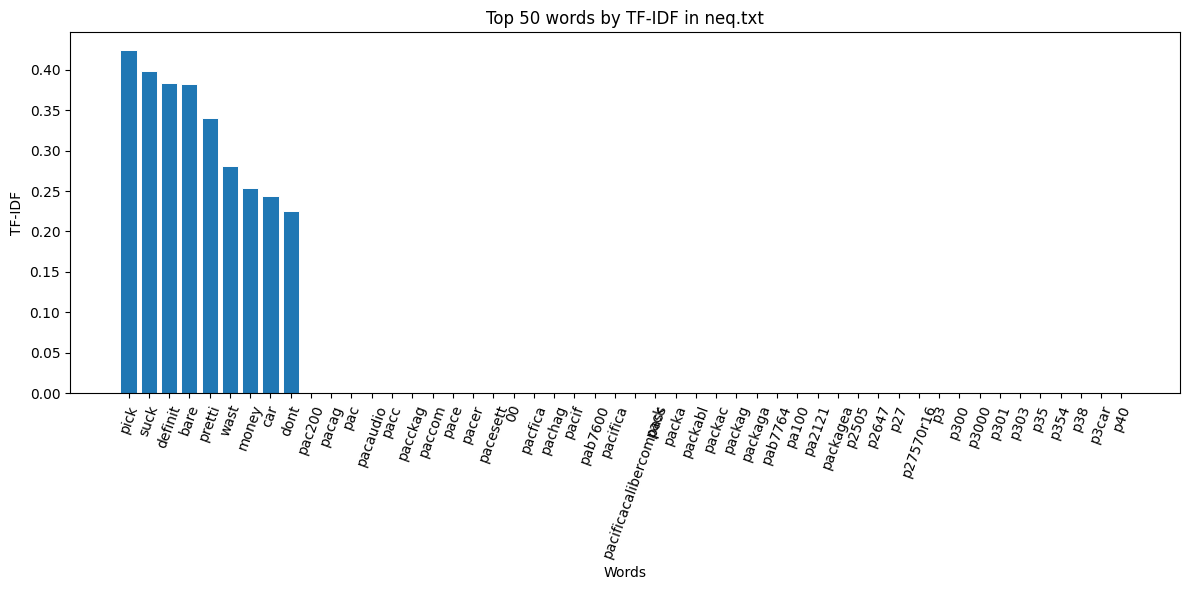

In [792]:

x = neq_ascending["index"].head(50)
y = neq_ascending[0].head(50)

fig, ax = plt.subplots(figsize=(12,6))

ax.bar(x, y, width=0.8, edgecolor="white", linewidth=0.7)

ax.set_xlabel("Words")
ax.set_ylabel("TF-IDF")
ax.set_title("Top 50 words by TF-IDF in neq.txt")

plt.xticks(rotation=70)

plt.tight_layout()
plt.show()


plt.show()

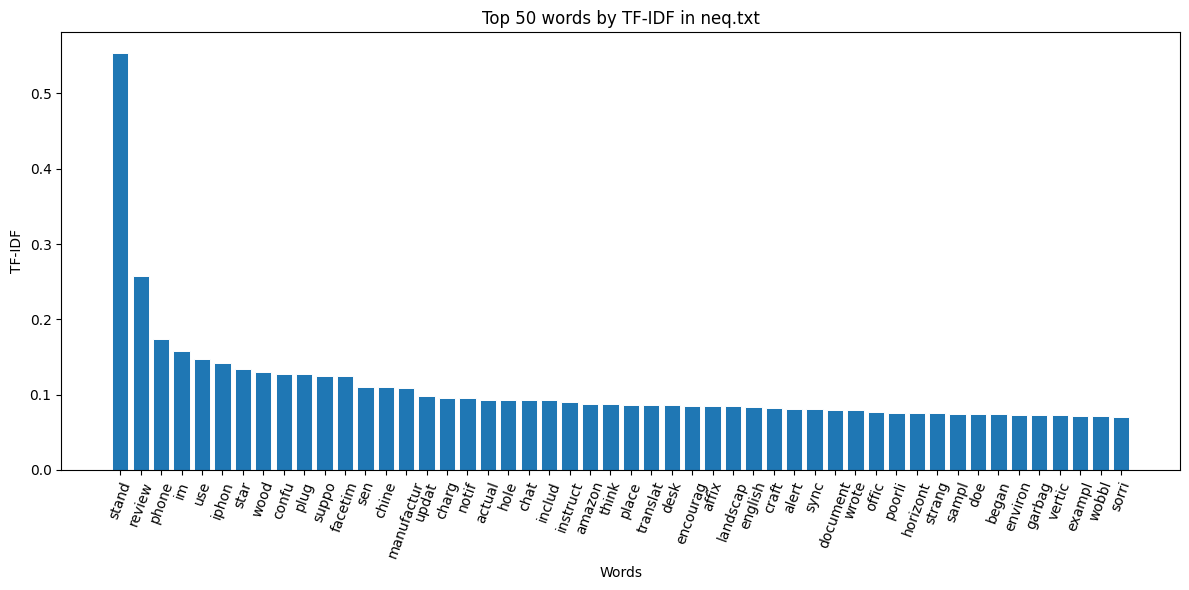

In [793]:

x = pos_ascending["index"].head(50)
y = pos_ascending[0].head(50)

fig, ax = plt.subplots(figsize=(12,6))

ax.bar(x, y, width=0.8, edgecolor="white", linewidth=0.7)

ax.set_xlabel("Words")
ax.set_ylabel("TF-IDF")
ax.set_title("Top 50 words by TF-IDF in neq.txt")

plt.xticks(rotation=70)

plt.tight_layout()
plt.show()


plt.show()

I must say that this is probably wrong. The guidelines for the tfidf are pretty bad and there are many ways of approaching this, I first approaching it by referencing each positive and neqative review as an entity and matching if a word is found on either document side and this way counting the tfidf by hand. Then reread the exercise and thought that I'd just use the sklearn library. Anyways, I'd love for some extra material to study and examples for each exercise.

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 4 | Junk charts

There’s a thriving community of chart enthusiasts who keep looking for statistical graphics that they find inappropriate, and which they call “junk charts”, and who often also propose ways to improve them.

1. Find at least three statistical visualizations you think are not very good and identify their problems. Copying examples from various junk chart websites is not accepted – you should find your own junk charts, out in the wild. You should be able to find good (or rather, bad) examples quite easily since a significant fraction of charts can have at least *some* issues. The examples you choose should also have different problems, e.g., try to avoid collecting three bar charts, all with problematic axes. Instead, try to find as interesting and diverse examples as you can.

2. Try to produce improved versions of the charts you selected. The data is of course often not available, but perhaps you can try to extract it, at least approximately, from the chart. Or perhaps you can simulate data that looks similar enough to make the point.



([<matplotlib.patches.Wedge at 0x476618f20>,
 [Text(0.9801071672559598, 0.4993895680663527, 'Frogs'),
  Text(-0.33991877217145816, 1.046162142464278, 'Hogs'),
  Text(-0.49938947630209474, -0.9801072140121813, 'Dogs'),
  Text(1.0461621822461364, -0.3399186497354948, 'Logs')],
 [Text(0.5346039094123416, 0.2723943098543742, '15.0%'),
  Text(-0.18541023936624987, 0.5706338958896061, '30.0%'),
  Text(-0.27239425980114257, -0.5346039349157352, '45.0%'),
  Text(0.5706339175888016, -0.18541017258299716, '10.0%')])

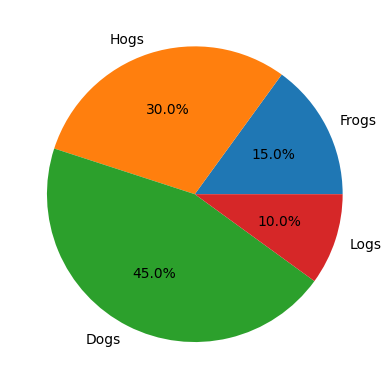

In [800]:
# Pie chart improvements_

labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')


# Just keeping it 2d and not messing around. The 3D pie chart with a ton of variables is bad, an improvement idea is to show percentages on the charts

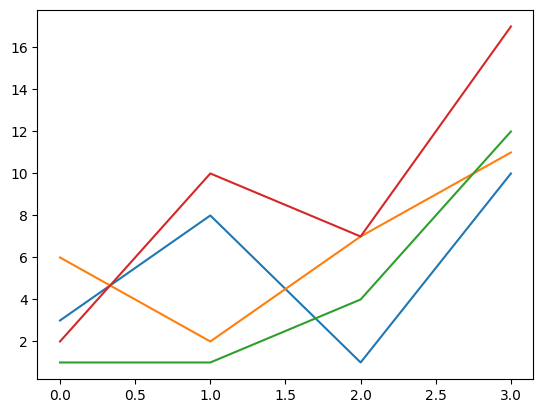

In [ ]:
# Line chart improvement

y1 = np.array([3, 8, 1, 10])
y2 = np.array([6, 2, 7, 11])
y3 = np.array([1, 1, 4, 12])
y4 = np.array([2, 10, 7, 17])

plt.plot(y1)
plt.plot(y2)
plt.plot(y3)
plt.plot(y4)

plt.show()

#Depending on the information you want to show, I'd generally want to see in a linechart the way each line compares against the others. 
# When you stack the lines it becomes cluttered very easily

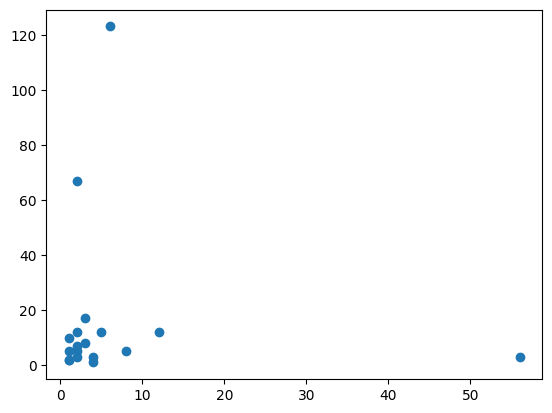

In [ ]:
# Connected scatter plot is probably the worst design ever :D
y3 = np.array([1,1,2,3,5,2,12,2,3,4,6,8,56,4,1,2, 1,2])
y4 = np.array([2, 10, 7, 17,12,5,12,67,8,3,123,5,3,1,2,3,5,12.1])



plt.scatter(y3, y4)


# this is just a demonstrates that scatter plots should prove a point of a cluster etc. if you ad connected lines to this, like a timeline,
# It will destroy the purpose of the chart

**Submit a PDF with all the charts (the ones you found and the ones you produced).**